### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Шалыгин Георгий
##### Группа:   НФИ-20

## Москва 2023
***

### Вариант № 18

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией. Набор данных: cherry_blossoms

Признаки с макимальной корреляцией 0.767866: temp, temp_upper

Признаки с минимальной корреляцией 0.030739: temp_lower, temp_upper

In [51]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [416]:
ds = tfds.load("cherry_blossoms", split='train')
df = tfds.as_dataframe(ds)
df.info()

,temp,temp_lower,temp_upper,year
0,6.46,4.76,8.16,1300
1,5.63,4.90,6.37,1638
2,5.81,4.68,6.95,1347
3,5.70,4.87,6.53,1187
4,6.20,5.31,7.09,1617
...,...,...,...,...
1210,6.45,5.81,7.10,1577
1211,5.71,4.97,6.44,1640
1212,6.68,6.08,7.27,1925
1213,6.15,5.29,7.01,1624


In [109]:
df.doy.unique() #признак, очевидно, дискретный (номер дняв году)

array([ nan, 105., 109., 104., 107.,  94.,  97., 111., 108., 112., 100.,
       114., 103., 106.,  98.,  91., 110., 101.,  96., 102.,  93.,  99.,
       113., 115.,  92.,  95., 122., 120.,  88., 117., 118., 116., 119.,
        89., 124.,  87.,  90.,  86.], dtype=float32)

In [110]:
df = df.drop('doy', axis=1)

In [111]:
#удалим строки с пропущенными значениями
print(df.shape)
nan_i = []
for i in range(df.shape[0]):
  if False in list((df.iloc[i]).notna()):
    nan_i.append(i)
df = df.drop(nan_i, axis=0)
print(df.shape)

(1215, 4)
(1124, 4)


In [112]:
df.corr()

,temp,temp_lower,temp_upper,year
temp,1.000000,0.663891,0.767866,-0.066062
temp_lower,0.663891,1.000000,0.030739,0.479762
temp_upper,0.767866,0.030739,1.000000,-0.499087
year,-0.066062,0.479762,-0.499087,1.000000


2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

- Независимая переменная: temp_lower 

- Зависимая переменная: year 

- Визуализация для независимой переменной – диаграмма размаха 

- Визуализация для зависимой переменной – эмпирическая функция распределения 

<Axes: title={'center': 'Диаграмма размаха признака temp_lower'}, ylabel='Значения temp_lower'>

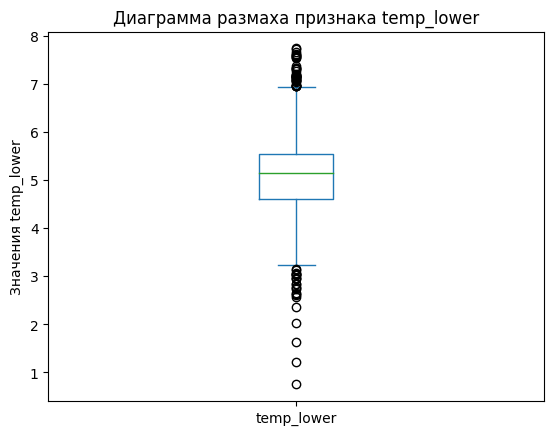

In [113]:
df.temp_lower.plot.box(title='Диаграмма размаха признака temp_lower', ylabel='Значения temp_lower')

<Axes: title={'center': 'График эмпирической функции распределения признака year'}, xlabel='year', ylabel='ECDF(year)'>

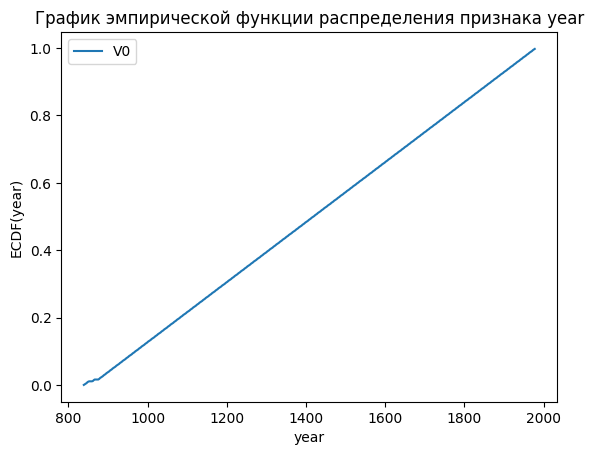

In [114]:
#получается гладкая, т.к. возможных значений достаточно много
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

samples = df['year'] # sepal length
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

df_ECDF = pd.DataFrame(ylist, columns=['V0'],index=xlist)
df_ECDF.plot.line(title='График эмпирической функции распределения признака year', xlabel='year', ylabel='ECDF(year)')


3. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества  R2  двух подходов.

  Значения для точного и нейросети: (0.23017187719770082, 0.21792359666654715)

  Точный подход, очевидно, оказывается лучше, но и нейросеть дает неплохой (сравнительно...) результат.

In [397]:
x = np.array(df.temp_lower)
y = np.array(df.year)

In [148]:
#расчет коэффициентов прямой
a = (x - x.mean()).dot(y - y.mean()) / (x - x.mean()).dot(x - x.mean())
b = y.mean() - a * x.mean()
y_predict_1 = a * x + b

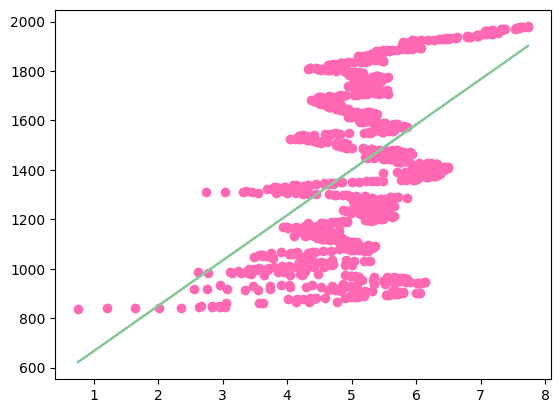

In [125]:
plt.scatter(x, y, color='hotpink')
plt.plot(x, y_predict_1, color='#88c999')

In [139]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [132]:
model = Sequential(Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
model.fit(x, y, epochs=300,verbose=0)

In [144]:
y_predict_2 = model.predict(x)

36/36 [==============================] - 0s 1ms/step


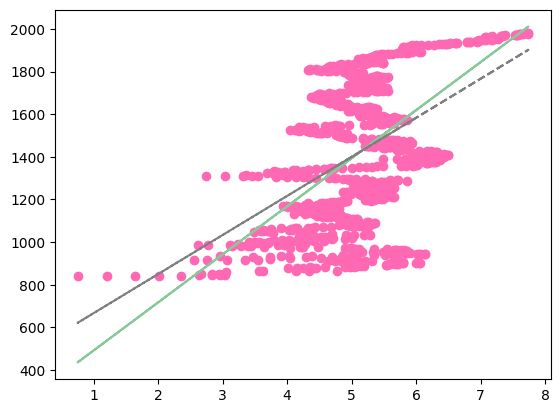

In [149]:
plt.scatter(x, y, color='hotpink')
plt.plot(x, y_predict_2, color='#88c999')
plt.plot(x, y_predict_1, '--', color='grey')

In [155]:
y_predict_2 = [x[0] for x in y_predict_2]

In [326]:
r21 = 1 -  np.sum((y - y_predict_1)**2) / len(y) / y.var()
r22 = 1 - np.sum((y-y_predict_2)**2)/y.shape[0]/y.var()
r21, r22

(0.23017187719770082, 0.21792359666654715)

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

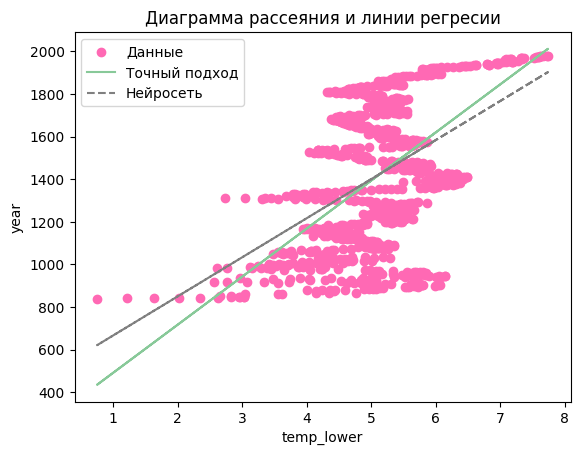

In [398]:
plt.scatter(x, y, color='hotpink', label='Данные')
plt.plot(x, y_predict_2, color='#88c999', label='Точный подход')
plt.plot(x, y_predict_1, '--', color='grey', label='Нейросеть')
plt.xlabel('temp_lower')
plt.ylabel('year')
plt.title('Диаграмма рассеяния и линии регресии')
plt.legend()

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).



In [241]:
ds_train, ds_test = tfds.load("cherry_blossoms", split=['train[:80%]', 'train[80%:]'])

In [242]:
df_train = tfds.as_dataframe(ds_train)
df_test = tfds.as_dataframe(ds_test)

In [243]:
df_train.drop('doy', axis=1, inplace=True)
df_test = df_test.drop('doy', axis=1)

In [249]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 242
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        228 non-null    float32
 1   temp_lower  228 non-null    float32
 2   temp_upper  228 non-null    float32
 3   year        228 non-null    int32  
dtypes: float32(3), int32(1)
memory usage: 5.3 KB


In [246]:
#удаление пропущенных значений
nan_i = []
for i in range(df_train.shape[0]):
  if False in list((df_train.iloc[i]).notna()):
    nan_i.append(i)
df_train = df_train.drop(nan_i, axis=0)

In [247]:
nan_i = []
for i in range(df_test.shape[0]):
  if False in list((df_test.iloc[i]).notna()):
    nan_i.append(i)
df_test = df_test.drop(nan_i, axis=0)

In [250]:
# разделим выборку на признаки и зависимую переменную
y_train = df_train.year
y_test = df_test.year
df_train.drop('year', axis=1, inplace=True)
df_test.drop('year', axis=1, inplace=True)

In [253]:
df_normalizer = tf.keras.layers.Normalization()
df_normalizer.adapt(df_train)
print(df_normalizer.mean.numpy())
print(df_normalizer.variance.numpy())

[[6.1558475 5.1097665 7.2022877]]
[[0.44610217 0.725652   0.9871867 ]]


6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:

  - линейной регрессии
  - гребневой регрессии (L2)
  - лассо регрессии (L1)

In [342]:
#линейная регресиия
df_normalizer0 = tf.keras.layers.Normalization()
df_normalizer0.adapt(df_train)
model0 = Sequential([
    df_normalizer0,
    Dense(units=1)
])

In [343]:
#гребневой регрессии (L2)
df_normalizer1 = tf.keras.layers.Normalization()
df_normalizer1.adapt(df_train)
model1 = Sequential([
    df_normalizer1,
    Dense(units=1, kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])

In [344]:
#лассо регрессии (L1)
df_normalizer2 = tf.keras.layers.Normalization()
df_normalizer2.adapt(df_train)
model2 = Sequential([
    df_normalizer2,
    Dense(units=1, kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])

In [345]:
model0.compile(loss='mse', optimizer=tf.optimizers.Adam(learning_rate=0.5))
model1.compile(loss='mse', optimizer=tf.optimizers.Adam(learning_rate=0.5))
model2.compile(loss='mse', optimizer=tf.optimizers.Adam(learning_rate=0.5))


In [346]:
%%time
history0 = model0.fit(
    df_train, y_train,
    epochs=300,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

CPU times: user 22.1 s, sys: 970 ms, total: 23.1 s
Wall time: 22.6 s


In [347]:
%%time
history1 = model1.fit(
    df_train, y_train, 
    epochs=300,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

CPU times: user 22.5 s, sys: 973 ms, total: 23.5 s
Wall time: 41.4 s


In [348]:
%%time
history2 = model2.fit(
    df_train, y_train, 
    epochs=300,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

CPU times: user 22.3 s, sys: 959 ms, total: 23.3 s
Wall time: 22.8 s


7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

  Показатель качества регрессии – R^2 (коэффициент детерминации) 

  Для трех моделей показатели равны: (0.8613192171635163, 0.8614748435558794, 0.8616035109231868). Строим историю для третей модели. Видно, что регуляризация и нормализация несильно улучшают качество модели. Однако от модели с 1м параметром она отличается значительно.

In [349]:
y_pred0 = model0.predict(df_test)
y_pred1 = model1.predict(df_test)
y_pred2 = model2.predict(df_test)
y_pred0 = [x[0] for x in y_pred0]
y_pred1 = [x[0] for x in y_pred1]
y_pred2 = [x[0] for x in y_pred2]

8/8 [==============================] - 0s 2ms/step


In [350]:
r0 = 1 - np.sum((y_test-y_pred0)**2)/y_train.shape[0]/y_test.var()
r1 = 1 - np.sum((y_test-y_pred1)**2)/y_train.shape[0]/y_test.var()
r2 = 1 - np.sum((y_test-y_pred2)**2)/y_train.shape[0]/y_test.var()
r0, r1, r2

(0.8613192171635163, 0.8614748435558794, 0.8616035109231868)

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).


In [356]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])*0.5])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

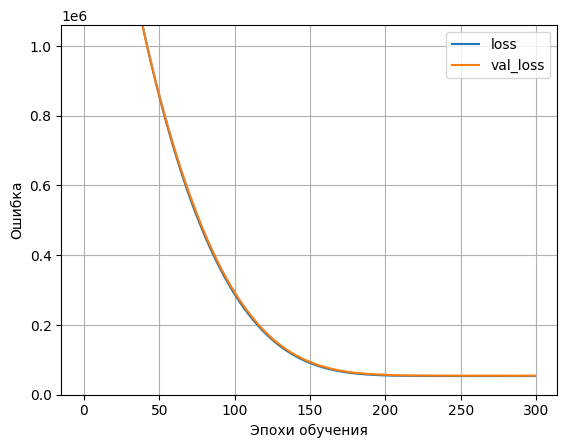

In [358]:
plot_loss(history2)

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

In [420]:
df_mean = df.median()
df_mean

temp             6.100
temp_lower       5.145
temp_upper       7.040
year          1418.500
dtype: float64

In [421]:
x = np.linspace(df.temp_lower.min(), df.temp_lower.max(), 200)
X = [[df_mean.temp, x[i], df_mean.temp_upper] for i in range(len(x))]
X = pd.DataFrame(X)

In [422]:
X

,0,1,2
0,6.1,0.750000,7.04
1,6.1,0.785126,7.04
2,6.1,0.820251,7.04
3,6.1,0.855377,7.04
4,6.1,0.890503,7.04
...,...,...,...
195,6.1,7.599497,7.04
196,6.1,7.634623,7.04
197,6.1,7.669749,7.04
198,6.1,7.704874,7.04


In [423]:
y0 = model0.predict(X)
y1 = model1.predict(X)
y2 = model2.predict(X)
y0 = [x[0] for x in y0]
y1 = [x[0] for x in y1]
y2 = [x[0] for x in y2]

7/7 [==============================] - 0s 3ms/step


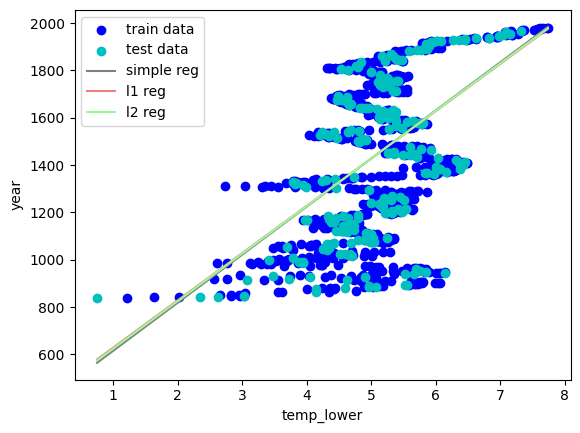

In [424]:
plt.scatter(df_train.temp_lower, y_train, color='b', label='train data')
plt.scatter(df_test.temp_lower, y_test, color='c', label='test data')
plt.plot(x, y0, color='grey', label='simple reg')
plt.plot(x, y1, color='#F08080', label='l1 reg')
plt.plot(x, y2, color='#98FB98', label='l2 reg')
plt.xlabel('temp_lower')
plt.ylabel('year')
plt.legend()